#### 📚Chapter6 학습 관련 기술들

##### 6.1 매개변수 갱신

📌 최적화<br> : 손실 함수의 값을 가능한 낮추는 매개변수의 최적값을 찾는 문제를 푸는 것<br><br>
📌 확률적 경사 하강법(SGD)<br> : 매개변수의 기울기를 구해, 기울어진 방향으로 매개변수의 값을 갱신하는 일을 반복하는 방법

6.1.2 확률적 경사 하강법(SGD)

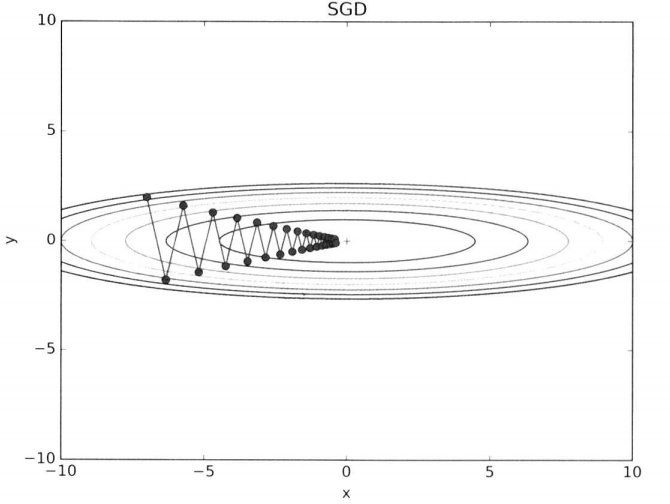

In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr    # lr : learning rate

    # params, grads : dictionary
    # params['W1'], grads['W1'] : 가중치 매개변수와 기울기 저장
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

6.1.3 SGD의 단점<br><br>
📌 비등방성(기울기가 달라지는 함수)에서는 탐색 경로가 비효율적임<br><br>
📌 단점을 개선해주는 모멘텀, AdaGrad, Adam이라는 방법 사용

6.1.4 모멘텀<br><br>
📌 x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속<br><br>
📌 y축의 힘은 크지만 위아래로 번걸아 받아서 상충하여 y축 방향의 속도는 안정적이지 X<br><br>
📌 SGD보다 x축 방향으로 빠르게 다가가 지그재그 움직임이 줄어듦

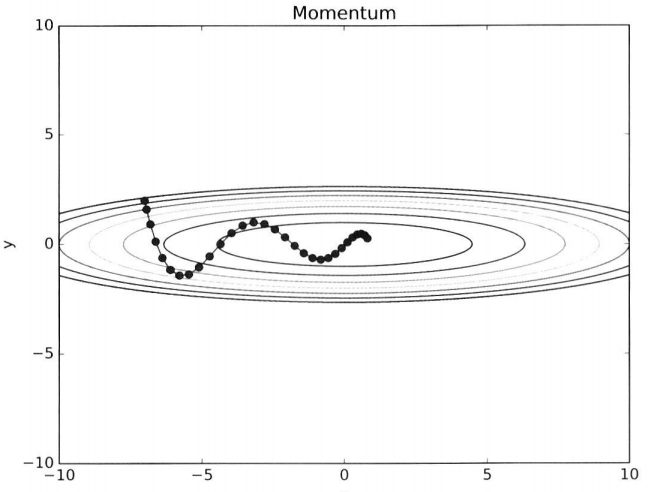

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None   # 속도

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

6.1.5 AdaGrad<br><br>
📌 개별 매개변수에 적응적으로 학습률을 조정하면서 학습 진행<br><br>
📌 과거의 기울기를 제곱하여 계속 더해감 => 학습을 진행할수록 갱신 강도가 약해짐

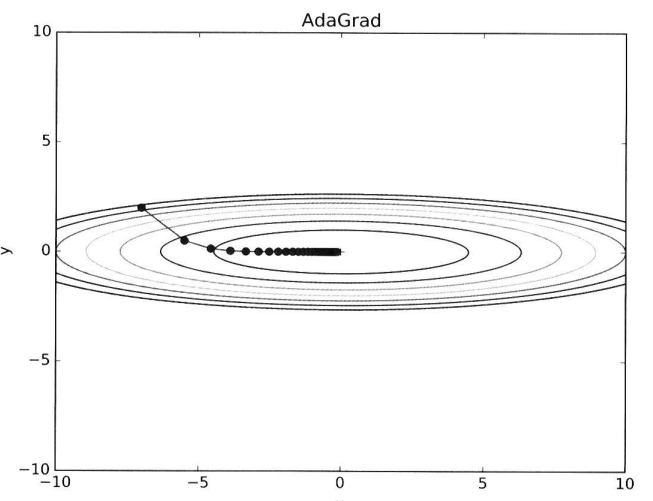

In [4]:
import numpy as np

In [6]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        # h : 기존 기울기 값의 제곱
        if self.h is None:
            self.h = {}

        for key, val in params.items():
            self.h[key] = np.zeros_like(val)
    
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            # 1e-7은 self.h[key]에 0이 담겨 있다 해도 0으로 나누는 사태를 막아줌
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key])) + 1e-7

6.1.6 Adam<br><br>
📌 Momentum + AdaGrad<br><br>
📌 하이퍼파라미터의 "편향 보정"이 진행됨<br><br>
📌 좌우 흔들림이 적음 => 학습의 갱신 강도를 적응적으로 조정해서 얻는 혜택

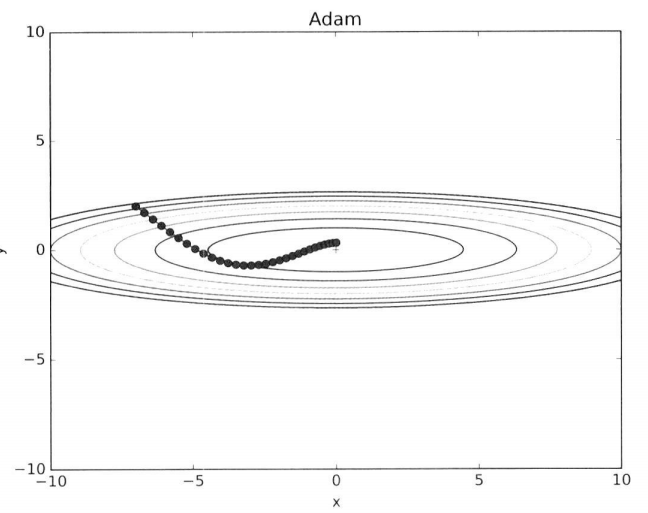